In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'NFLX'
# ticker = 'AAPL'


''' время '''
stime='1990-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df.tail(3)

,NFLX
Date,
2022-11-01 00:00:00-04:00,305.529999
2022-12-01 00:00:00-05:00,294.880005
2023-01-01 00:00:00-05:00,315.779999


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df.head(3)

,NFLX
Date_index,
2002-06-01,0.999286
2002-07-01,0.953571
2002-08-01,0.936429


In [7]:
# df.loc['1999-01-01']

In [8]:
# df_st_gr = fa.financial_statement_growth(ticker, api_key, period='annual') #quarter 

In [9]:
# df_st_gr

In [10]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,71.094428,10.101066,4.556479,3.639612,13.623745,46.722497,46.722497,46.722497,33.864079,145118298340,154324198340,32.30649,4.590092,71.6189,89.660666,6.98443,6.98443,4.881275,7.589856,76.162204,95.348488,0.030954,0.011153,0.690802,0.572435,0.452758,1.16839,7.976119,0.451089,None,0,0.049751,0.08575,0,-0.201223,-0.012896,-0.028388,0.018202,103.047603,0.138522,0.092436,6.282061,1335499000,None,-18550894000,0.690802,16770516500,754498000,None,377.943773,12.786864,0,0.965752,28.54492,None,0.216193,-0.916867
2021,FY,67.353963,11.603476,0.89043,-0.299316,13.670908,35.945696,-34.179041,35.945696,36.647105,169472773482.538818,178837864482.538818,33.124555,5.706568,431.656793,-1284.127854,10.692796,10.692796,6.021914,9.390525,455.510212,-1355.088952,0.030189,-0.000779,0.927052,0.644513,0.491748,0.950625,8.09084,0.076738,None,0,0.045512,0.076567,0.693502,-1.336148,-0.017664,-0.042173,0.013577,96.874342,0.171614,0.3744,-50.132157,-419141000,-15070291000,-20665590000,0.971207,804320000,837483000,None,9.885458,17.636121,0,36.922921,20.696161,None,0.322806,-1.189746
2020,FY,56.690426,6.262774,5.50455,4.375273,18.609981,25.095686,-32.474474,25.095686,40.131617,234742470017.461182,242845893017.461182,85.008653,9.39118,96.71818,121.681561,21.214404,21.214404,9.715368,15.659485,100.056938,125.882067,0.011764,0.008218,1.428717,0.718301,0.522535,1.250557,3.308433,0.878931,None,0,0.116262,0.073196,0.646225,-0.205153,-0.01992,-0.045586,0.01661,59.466746,0.145682,0.198713,-44.342207,1955795000,-14318710000,-18453539000,1.473892,707569500,746833000,None,8.919365,15.678305,0,40.922198,23.280577,None,0.249556,-1.129277


In [11]:
df_key_metr.index[0]

'2022'

In [12]:
df_key_metr = df_key_metr.loc['2022':'2000'].copy(deep=True)
index_years = df_key_metr.index.to_list()
index_years


['2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002']

In [13]:
# financial_ratios = fa.financial_ratios(ticker, api_key, period='annual')
# financial_ratios = financial_ratios.T
# financial_ratios

In [14]:
# df_fin_rat = financial_ratios
# df_fin_rat = df_fin_rat.loc['2022':'2000'].copy(deep=True)
# index_years = df_fin_rat.index.to_list()
# index_years

stock data detailed

In [15]:
# stock_data = fa.stock_data(ticker, period="max", interval="1mo")
# stock_data

In [16]:
# stock_data_det = fa.stock_data_detailed(ticker, api_key)
# stock_data_det

In [17]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_prices

[315.7799987792969,
 427.1400146484375,
 532.3900146484375,
 345.0899963378906,
 339.5,
 270.29998779296875,
 140.7100067138672,
 91.83999633789062,
 63.11428451538086,
 58.47571563720703,
 23.605714797973633,
 17.171428680419922,
 30.582857131958008,
 8.89285659790039,
 5.1628570556640625,
 3.5928568840026855,
 3.258570909500122,
 3.93571400642395,
 1.6428569555282593,
 5.243570804595947,
 0.942857027053833]

In [18]:
df_key_metr[ticker] = list(stock_year_prices)

In [19]:
df_key_metr.drop('period', axis=1, inplace=True)

In [20]:
df_key_metr.tail(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,NFLX
2004,1.391057,0.059341,0.405508,0.364395,0.479399,0.429448,0.426807,0.429448,0.000187,594742823.976,420349823.976,27.540765,1.174852,4.030215,4.484936,3.80555,3.80555,0.830357,3.822057,2.848458,3.169844,0.03631,0.222969,0,0.37932,-1.585679,1.973933,None,6.833573,None,0,0,0.045248,0.003817,-0.101388,-0.029556,-0.169629,0,0.757221,0.123366,0.086093,0.216948,92436000,155322000,91836000,0.000435,None,443629000,None,0,65.716583,0,None,5.554154,None,0.138179,-0.041114,1.642857
2003,0.406938,0.009734,0.134217,0.037817,0.202078,0.168471,0.164065,0.168471,0.000622,3507969839.4832,3418491839.4832,538.693157,12.885436,39.067733,138.654934,31.124409,31.124409,12.556767,59.44893,38.07123,135.118255,0.001856,0.007212,0,0.359657,-1.556058,2.204827,None,13.788698,None,0,0,0.065691,0.016749,-0.718238,-0.236891,-1.264772,0,0.192087,0.039578,0.037628,0.107454,75927000,109760000,75642000,0.003691,None,435068500,None,0,80.336411,0,None,4.543394,None,0.057778,-0.0964,5.243571
2002,0.773983,-0.111165,0.203183,0.067331,0.524799,0.4526,0.421733,0.4526,0.006235,178108288.204,119525288.204,-8.115382,1.165584,4.440053,13.398653,1.993244,1.993244,0.782203,26.385273,2.97964,8.991596,-0.123223,0.074634,0,0.315437,-12.93223,2.648667,None,-1.827767,None,0,0,0.09571,0.046687,-0.668619,-0.175523,-1.012992,0,1.063976,-0.129539,-0.176372,0.316247,66649000,83262000,65901000,0.013776,None,428916500,None,0,95.061815,0,None,3.839607,None,-0.245613,-0.135852,0.942857


In [21]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                if y != len(v):
                    vv = (v[y] / (v[y+1] / 100)) - 100
                    l.append(vv)
                    # print(vv)
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes = change_percent_all_columns(df_key_metr)

            

In [22]:
df_with_changes.columns.to_list()

['revenuePerShare',
 'netIncomePerShare',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'bookValuePerShare',
 'tangibleBookValuePerShare',
 'shareholdersEquityPerShare',
 'interestDebtPerShare',
 'marketCap',
 'enterpriseValue',
 'peRatio',
 'priceToSalesRatio',
 'pocfratio',
 'pfcfRatio',
 'pbRatio',
 'ptbRatio',
 'evToSales',
 'enterpriseValueOverEBITDA',
 'evToOperatingCashFlow',
 'evToFreeCashFlow',
 'earningsYield',
 'freeCashFlowYield',
 'debtToEquity',
 'debtToAssets',
 'netDebtToEBITDA',
 'currentRatio',
 'interestCoverage',
 'incomeQuality',
 'dividendYield',
 'payoutRatio',
 'salesGeneralAndAdministrativeToRevenue',
 'researchAndDdevelopementToRevenue',
 'intangiblesToTotalAssets',
 'capexToOperatingCashFlow',
 'capexToRevenue',
 'capexToDepreciation',
 'stockBasedCompensationToRevenue',
 'grahamNumber',
 'roic',
 'returnOnTangibleAssets',
 'grahamNetNet',
 'workingCapital',
 'tangibleAssetValue',
 'netCurrentAssetValue',
 'investedCapital',
 'avera

In [23]:
df_with_changes = df_with_changes.reindex(index=df_with_changes.index[::-1])
df_with_changes.head(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,NFLX,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % NFLX
2002,0.773983,-0.111165,0.203183,0.067331,0.524799,0.4526,0.421733,0.4526,0.006235,178108288.204,119525288.204,-8.115382,1.165584,4.440053,13.398653,1.993244,1.993244,0.782203,26.385273,2.97964,8.991596,-0.123223,0.074634,0,0.315437,-12.93223,2.648667,None,-1.827767,None,0,0,0.09571,0.046687,-0.668619,-0.175523,-1.012992,0,1.063976,-0.129539,-0.176372,0.316247,66649000,83262000,65901000,0.013776,None,428916500,None,0,95.061815,0,None,3.839607,None,-0.245613,-0.135852,0.942857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0,0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2003,0.406938,0.009734,0.134217,0.037817,0.202078,0.168471,0.164065,0.168471,0.000622,3507969839.4832,3418491839.4832,538.693157,12.885436,39.067733,138.654934,31.124409,31.124409,12.556767,59.44893,38.07123,135.118255,0.001856,0.007212,0,0.359657,-1.556058,2.204827,None,13.788698,None,0,0,0.065691,0.016749,-0.718238,-0.236891,-1.264772,0,0.192087,0.039578,0.037628,0.107454,75927000,109760000,75642000,0.003691,None,435068500,None,0,80.336411,0,None,4.543394,None,0.057778,-0.0964,5.243571,-47.422934,-108.756272,-33.942565,-4

Current tests

In [24]:
df_some_columns = df_with_changes[[f'change % {ticker}', 'change % debtToAssets']]
df_some_columns.head(3)

,change % NFLX,change % debtToAssets
2002,0.000000,0.000000
2003,456.136366,14.018718
2004,-68.669118,5.466933


In [25]:
st.mean(df_some_columns[f'change % {ticker}'].to_list()[1:])

62.78547588040508

Vizualization

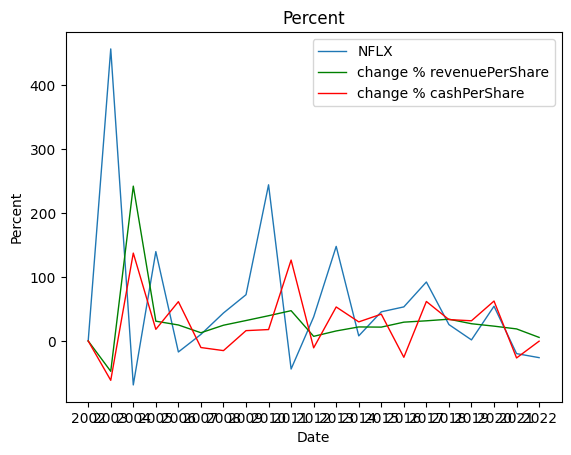

In [26]:
# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')

x = 'change % revenuePerShare'
y = 'change % cashPerShare'


# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[x],'g',lw=1, label=x)
plt.plot(df_with_changes[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

In [27]:
	# change % netDebtToEBITDA	change % currentRatio

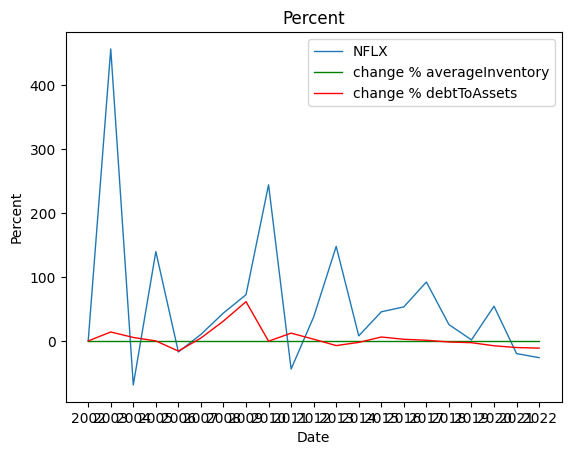

In [28]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z = 'change % averageInventory'
e = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z],'g',lw=1, label=z)
plt.plot(df_with_changes[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

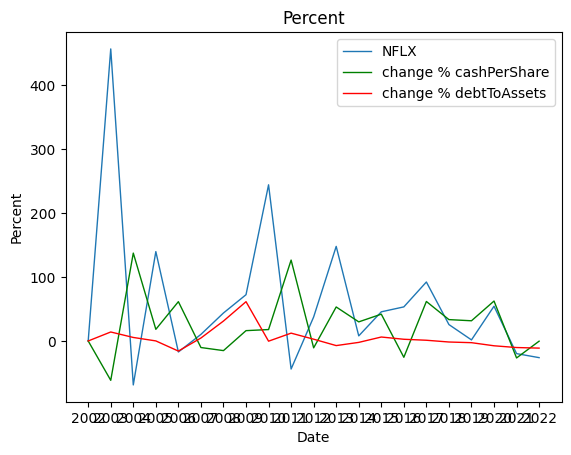

In [29]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()